![Scikit_learn_logo_small.svg](images/Scikit_learn_logo_small.svg)
# Scikit-learn Tutorial
Scikit-learn is a data analysis package for Python that includes many tools for traditional machine learning (no deep learning, but can work in conjunction with Tensorflow, Keras, etc.). Scikit comes standard in most numerical or data analysis Python distributions (e.g. Anaconda) and provides all of the tools necessary to build a powerful machine learning pipeline (even the data!) and evaluate its performance. The Scikit-learn website provides a great categorization of traditional machine learning and data analysis in general with tutorials on how to use the package as well as more in-depth description of the theory of each tool with references to the papers the methods come from to really understand how and when to use each method. Scikit is open source and each part of the package has a link to its source on GitHub and is a great way to learn how to program Python!

[Image Source](https://en.wikipedia.org/wiki/Scikit-learn)

In [2]:
"""
Normally its preferred to import packages as needed from sklearn rather than the
whole category, but for the purposes of this tutorial its easier to import the whole 
thing.
"""
import sklearn.datasets as datasets # note the package name is sklearn NOT scikit-learn
import sklearn.tree as tree
import sklearn.naive_bayes as naive_bayes
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.decomposition as decomposition 
import sklearn.linear_model as linear_model
import sklearn.pipeline as pipeline
import sklearn.ensemble as ensemble
import sklearn.feature_selection as feature_selection
import sklearn.utils as utils
import sklearn.neural_network as neural_network

In [3]:
# Helper Imports
import numpy as np
import matplotlib.pyplot as plt

## Objective
* Learn how to get data using scikit
* Build a simple classifier
* Evaluate the classifier
* Optimize hyper-parameters via grid search
* Build a composite classifier with Pipeline

## Part 1 - Getting Data
Scikit-learn comes with a few toy datasets to try out different methods, but can also fetch datasets from [OpenML](https://www.openml.org) or load them from certain files (images, LIBSVM). If the data is in .csv, .txt, or similar format, Pandas can be used to read the data into a DataFrame which scikit can directly operate on.
### Genbank Splice Dataset
Primate DNA can be divided into 2 types of regions, Exons and Introns. Exons are the 'useful bits' of DNA that are used to encode the blueprint of whatever organism it belongs to while Introns are the 'junk' (but might be used in other ways) that exist in between Exon regions. When DNA is used to transcribe proteins, the Intron regions are effectively removed and the Exons are spliced together. This dataset provides a number of DNA sequences and the goal is to classify them as Intron/Exon boundaries (in both directions) or not. See the below figure for an example of the type of boundaries we will be looking for.

For a better description of the dataset and to view all of the metrics necessary for working on it, visit its OpenML webpage [here](https://www.openml.org/d/46).
![RNA_splicing_reaction.svg](images/RNA_splicing_reaction.svg)
[Image Source](https://en.wikipedia.org/wiki/RNA_splicing)

In [5]:
"""
WARNING: you may get an SSL Certificate error (on Mac, haven't tested on others), if this happens
the easiet workaround is to install Anaconda Navigator and run Jupyter Notebook from there.
"""

# import dataset from OpenML.org using the builtin scikit function
splice = datasets.fetch_openml('splice', version=1)

In [6]:
# print the dataset description from the OpenML website
print(splice.DESCR)

**Author**: Genbank. Donated by G. Towell, M. Noordewier, and J. Shavlik  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Splice-junction+Gene+Sequences))   
**Please cite**:  None  

Primate splice-junction gene sequences (DNA) with associated imperfect domain theory.
Splice junctions are points on a DNA sequence at which 'superfluous' DNA is removed during the process of protein creation in higher organisms. The problem posed in this dataset is to recognize, given a sequence of DNA, the boundaries between exons (the parts of the DNA sequence retained after splicing) and introns (the parts of the DNA sequence that are spliced out). This problem consists of two subtasks: recognizing exon/intron boundaries (referred to as EI sites), and recognizing intron/exon boundaries (IE sites). (In the biological community, IE borders are referred to a ''acceptors'' while EI borders are referred to as ''donors''.)

All examples taken from Genbank 64.1. Categories "ei" 

---
Scikit also includes functionality for preparing data for use by a machine learning model, in this case we use the function to split the data into train and test sets with the defualt split of 75/25. We will use the train and test sets to build and evaluate our models.

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(splice.data, splice.target)

For more datasets that can be imported to or loaded from scikit-learn, visit the website for the Scikit-learn [dataset loading utilites](https://scikit-learn.org/stable/datasets/index.html).

## Part 2: Building a Simple Classifier
### Decision Tree
Decision trees are machine learning models that create a binary tree of left/right decisions based on the training data. Each node in the tree is given an attribute and a value so that when a data point comes to that node, it will go left if the value of its attribut is less than the node's value or right if not (the order may be switched but it operates the same whether left/right or right/left). The splits are chosen based on how well that split divides the data into each class (using Information Theory ideas). The leaves of the tree are the classes that are most likely if a path is taken from the root to that leaf.

![CART_tree_titanic_survivors.png](images/CART_tree_titanic_survivors.png)

For a more in-depth description of Decision Trees visit its [Scikit-learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) or [Wikipedia entry](https://en.wikipedia.org/wiki/Decision_tree_learning).

[Image Source](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [8]:
"""
There are several types of Naive Bayes depending on the type of prediction task
for our purposes of non-binary classification, GaussianNB suffices
"""
dtc = tree.DecisionTreeClassifier()

Another advantage of Scikit-learn is how symantically similar all of its methods are. So the functions for one method will likely have the same name in another method (there are exceptions, but all classifiers have at least a fit and a predict method). The methods we will need are `fit` and `predict`. These fit the classifier to the training data and predict the labels for the test data respectively.

In [8]:
dtc.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

---
There is also a `score` option for most models that gives an overall accuracy measure directly given the test data and labels. 

In [9]:
dtc.score(test_data, test_labels)

0.9172932330827067

For a more in-depth analysis of the classifier's performance its usually best to look at the metrics of `precision`, `recall` and/or `f1`. These measures are not dependent on the prevalance of a given class like accuracy is. For an understanding of why this is important, consider classifying on data with 100 labels of one class and only 5 of the other. A classifier with 95% accuracy can be easily made by simply always predicting the majority (100 count) class.

For more on recall, precision, and f1 visit [this Wikipedia entry](https://en.wikipedia.org/wiki/Precision_and_recall)

In [10]:
# wrap in print() to "pretty print" the output in human readable format
print(metrics.classification_report(dtc.predict(test_data), test_labels))

              precision    recall  f1-score   support

          EI       0.94      0.87      0.90       198
          IE       0.88      0.85      0.87       186
           N       0.92      0.97      0.95       414

   micro avg       0.92      0.92      0.92       798
   macro avg       0.91      0.90      0.90       798
weighted avg       0.92      0.92      0.92       798



---
A neat part of using decision trees is being able to rank feature importance to the classification based on its ability to divide the data into the given classes. This could be useful for deciding what features to focus on when using other classifiers (feature selection) or for better understanding what the cause of the decision being made by the model is (this is heavily relied upon in medical data mining).

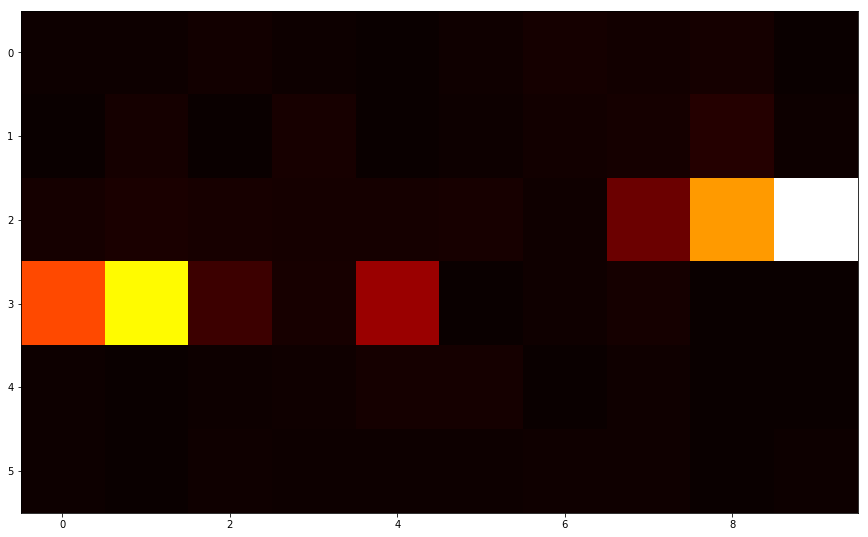

In [11]:
# show feature importance as a heatmap, transforming the data into a rectangle for compactness
fig, ax = plt.subplots(1,1)
ax.imshow(np.reshape(dtc.tree_.compute_feature_importances(), (6,10)), cmap='hot')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

### Ensemble and Random Forest
What could be better than 1 decision tree? 100 Decision trees! This is how a random forest operates in principal, by generating multiple decision trees, each given a subset of data, and using the mode (most frequent) label of each tree as the decision of the entire model. This is one of a few ensemble methods which in general work by training multiple machine learning methods (usually of the same type but not always) and somehow aggregating the results for a better overall model. However, there can be a tendency to overfit (perform poorly on the test data, i.e. not generalize well) among certain ensemble methods.

In [12]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(train_data, train_labels)
print(metrics.classification_report(rfc.predict(test_data), test_labels))

              precision    recall  f1-score   support

          EI       0.91      0.88      0.89       192
          IE       0.88      0.87      0.87       181
           N       0.94      0.96      0.95       425

   micro avg       0.92      0.92      0.92       798
   macro avg       0.91      0.90      0.91       798
weighted avg       0.92      0.92      0.92       798



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Grid Search
Grid searching is a method for tuning the hyper-parameters of a model (the parameters we pass to the model when creating it, the name hyper-parameter is meant to avoid confusion with models that use parameters internally, such as neural networks). By creating a search grid of different hyper-parameters and the acceptable range of values, the `GridSearchCV` method can choose the parameters that maximize the accuracy of the model using Cross Validation. 

Cross Validation (CV) is a technique used to evaluate models with multiple train/test splits. In each iteration of CV, 1/kth of the data is held back for testing, where k is the number of total CV iterations, and the rest of the data is used to train the model and the portion of data held back is different each time. The goal of CV is to get an average of model accuracy instead of a single test value that could be skewed if the test data was chosen poorly. This helps to choose a more generalizable model.
![K-fold_cross_validation_EN.jpg](K-fold_cross_validation_EN.jpg)
[Image Source](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

In [15]:
parameter_grid = {'n_estimators': [100, 300],
                  'criterion': ['gini', 'entropy']}
gsc = model_selection.GridSearchCV(rfc, parameter_grid, cv=4, scoring='accuracy')
gsc.fit(train_data, train_labels)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 300], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

---
Once the grid search is done running, we can retreive the parameters that produced the best overall model

In [ ]:
print(gsc.best_params_)

---
Likewise, we can get the best estimator (our machine learning model) directly.

In [16]:
print(metrics.classification_report(
    gsc.best_estimator_.predict(test_data), test_labels
))

              precision    recall  f1-score   support

          EI       0.96      0.93      0.94       192
          IE       0.93      0.92      0.93       181
           N       0.97      0.99      0.98       425

   micro avg       0.96      0.96      0.96       798
   macro avg       0.95      0.95      0.95       798
weighted avg       0.96      0.96      0.96       798



## Pipeline
A `Pipeline` is a way to create a custom machine learning model from other Scikit-learn models. This can be useful when you want to apply multiple steps of data preparation (e.g. feature extraction or feature selection) and then run that prepared data through a classifier, regressor, or clustering algorithm. By combining multiple components into a pipeline, the entire custom model can be trained and evaluated with only a single method call, and can even be combined with `GridSearchCV` to optimize the methods used in the pipeline itself!

With pipelines its easy to build very powerful composite machine learning models in only a few lines of code.

For this portion of the tutorial we will switch datasets to the Boston Housing dataset. The goal of using this data is to regress (predict a continuous value) the price of housing in Boston given 13 housing related variables. The attributes in this dataset are more independant than the previous dataset, so 

In [20]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

---
To create a pipeline, all that is needed is a list of components in the order that the data is exected to flow. This list is passed to the initializer of a Pipeline object, then the Pipeline object can be used just like any other Scikit-learn estimator.

In this case, we will add a dimension reduction method to linear regression to take the number of attributes from 13 to 3, which shrinks the search space of the regressor and hopefully improves its performance. Principal Component Analysis (PCA) is, in essence, a method that creates a number of components that are linear combinations of each attribute in the original dataset with the constraint that each component is perpendicular to the others (in the linear algebra sense) and each component is sorted by the amount of variance it captures. The math is fairly heavy but you can read more about PCA [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [22]:
pca = decomposition.PCA(n_components=3)
lr = linear_model.LinearRegression()
pipe = [('dim_red', pca), ('lr', lr)]
cpc = pipeline.Pipeline(pipe)

---
Its also possible to create composite evalutation criterion. In this case we can make sure both mean squared error and r2 are used to evaluate our pipelined model

In [23]:
scoring = {'mse': metrics.make_scorer(metrics.mean_squared_error), 
           'r2': metrics.make_scorer(metrics.r2_score)}

---
We can also directly cross-validate our pipelined model with the custom scoring criteria using the cross validate method. Notice we don't need to split the data into train and test sets when using cross validation because its handled by the model itself. However, this does not return a trained model, it is only used for evaluation.

In [24]:
model_selection.cross_validate(cpc, boston.data, boston.target, scoring=scoring, cv=3, return_train_score=False)

{'fit_time': array([0.01302791, 0.00131011, 0.00101709]),
 'score_time': array([0.00101399, 0.0007329 , 0.00070405]),
 'test_mse': array([59.01126664, 95.36610919, 71.92149858]),
 'test_r2': array([-0.19008017, -0.29296181, -0.0932006 ])}

---
### Putting Everything Together
Now that we have basic and ensemble methods, grid searches, CV, and pipelines in our toolkit, we can use them all at once to create a powerful composite estimator with optimized hyperparameters in only a handfull of lines of code. This last part will show how to use `GridSearchCV` to fill in a portion of our pipeline with the best estimator with the best parameters.

The first step is to create a pipeline with a missing value for an estimator. We give it a name (dim_red for dimension reduction), but a value of None.

In [25]:
lr = linear_model.LinearRegression()
pipe = [('dim_red', None), ('lr', lr)] # None is a placeholder for a method
cpr = pipeline.Pipeline(pipe)

---
For the grid search, we now add a new parameter to the grid that is the name of our missing module, and give it a list of estimator objects to choose from. Note that the `n_components` parameter is used by all 3 methods, so it can be optimized alongside choosing the actual method to use.

The grid search has also been told to specifically use the mean squared error from our custom scoring criteria as the way to evaluate the pipeline, otherwise it does a poor job of fitting the regressor.

In [36]:
parameter_grid = [
    {
        'dim_red': [decomposition.PCA(), decomposition.NMF(), decomposition.FactorAnalysis()],
        'dim_red__n_components': [1,13]
    }
]
cpgs = model_selection.GridSearchCV(cpr, parameter_grid, cv=3, scoring=scoring, refit='mse')
cpgs.fit(boston.data, boston.target)
cpgs.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'dim_red': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=13,
         noise_variance_init=None, random_state=0, svd_method='randomized',
         tol=0.01), 'dim_red__n_components': 13}

---
With a regressor which gives a continuous value, it can be harder to evaluate its performance compared to a classifier which has accuracy as well as precision/recall/f1. Mean squared error is not bounded to 0-1 like those measures are so its really only useful for comparing across models to see which gives the lowest score (and can be very decieving if the data is sinusoidal and the estimator predicts a straight line down the middle!). Usually the most sure way to check how the model is performing is to just visualize its output compared to the acutal value and to visually inspect how close the two line up. Of course this becomes trickier when there are multiple outputs, but since we have only one its straightforward.

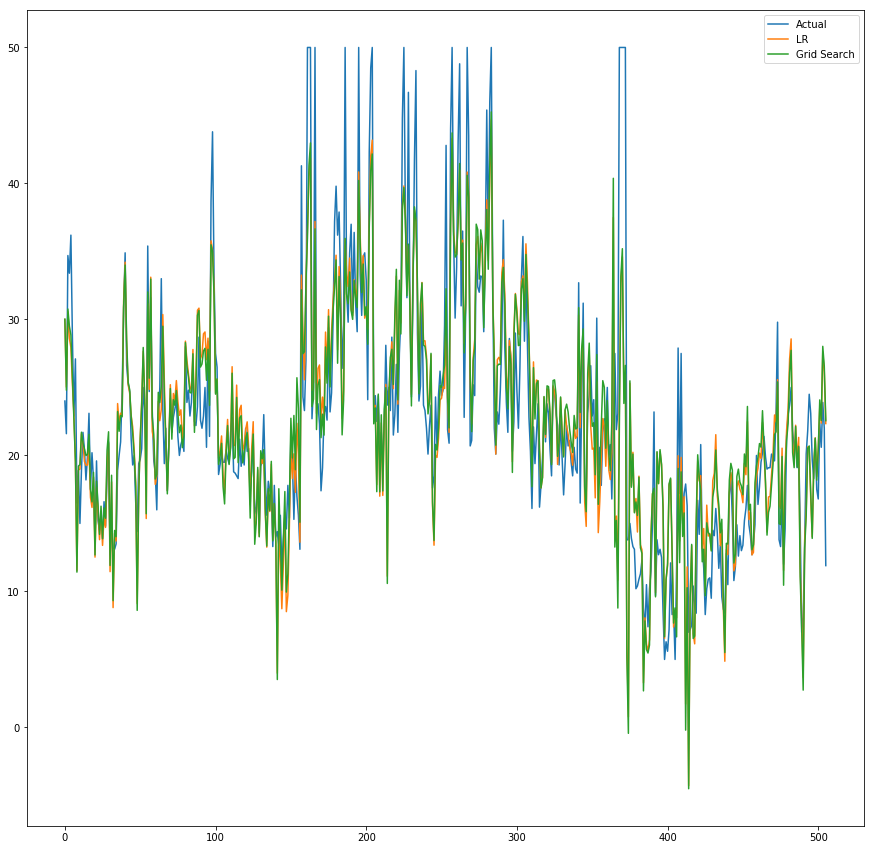

In [37]:
# fit the linear regressor itself to show improvement of dimension reduction
lr.fit(boston.data, boston.target)
fig, ax = plt.subplots(1,1)
ax.plot(boston.target)
ax.plot(lr.predict(boston.data))
ax.plot(cpgs.best_estimator_.predict(boston.data))
ax.legend(['Actual', 'LR', 'Grid Search'])
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

---
This data makes it a little difficult to visualize how well the models are matching the actual housing price, so we can sort the data in ascending-price order and see the trend much more easily.

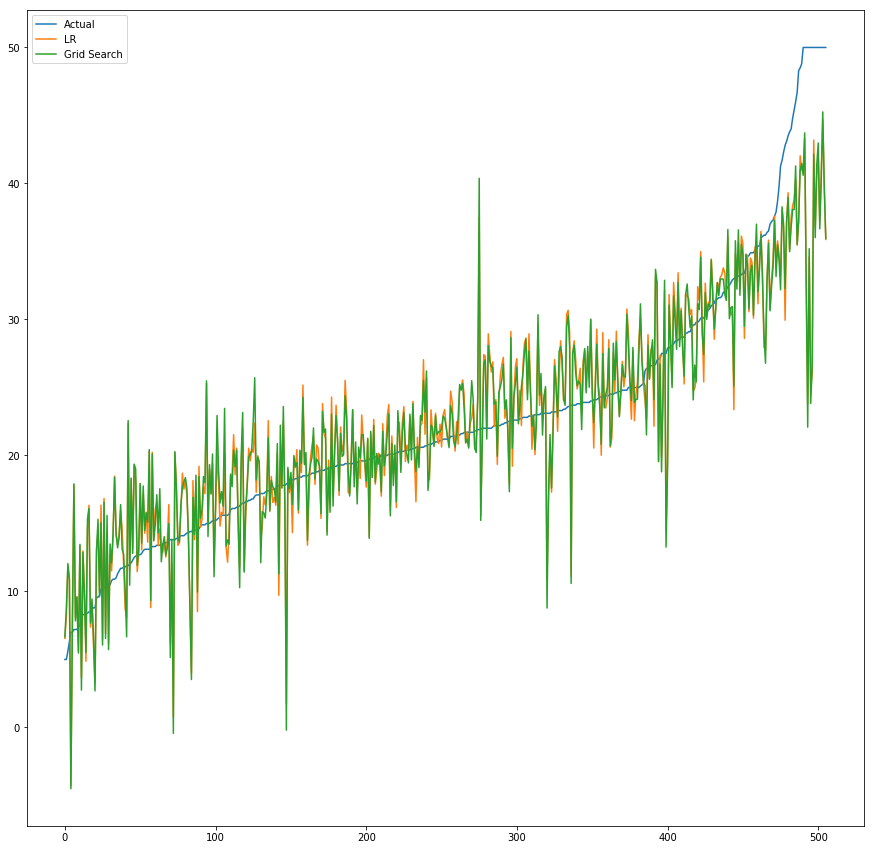

In [38]:
# sort the indices of the prices by price
inds = np.argsort(boston.target) 
# sort the data using the above indices
data_sort = boston.data[inds]
labels_sort = boston.target[inds]
# perform same plotting as above but on sorted data/labels
lr.fit(data_sort, labels_sort)
fig, ax = plt.subplots(1,1)
ax.plot(labels_sort)
ax.plot(lr.predict(data_sort))
ax.plot(cpgs.best_estimator_.predict(data_sort))
ax.legend(['Actual', 'LR', 'Grid Search'])
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

## END